# Formação Cientista de Dados
## Data Science Academy
### Projetos com Feedback

03 - Prevendo o Nível de Satisfação dos Clientes do Santander

Com a intenção de identificar clientes insatisfeitos antes que eles decidam pelo fim do relacionamento com a instituição, o grupo Santander disponibilizou um dataset no kaggle (https://www.kaggle.com/c/santander-customer-satisfaction) com diversas variáveis anônimas.
O objetivo é prever se o cliente está ou não satisfeito com sua experiência no banco (variável target - 0 ou 1) para que ações possam ser desenvolvidas a fim de evitar a perda deste cliente.

In [1]:
# Não mostrando avisos
import warnings
warnings.filterwarnings("ignore")

In [50]:
# Importando Pacotes Necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
import pickle
import numpy as np

__Carregando e entendendo os dados__

In [3]:
dados = pd.read_csv('datasets/train.csv')

In [4]:
# shape do dataset = 76020 linhas e 371 colunas
dados.shape

(76020, 371)

In [5]:
# NORMALIZAÇÃO - variáveis não estão na mesma escala
dados.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
# o dataset não apresenta valores nulos
dados.isnull().sum()

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

In [7]:
# BALANCEAMENTO - variável target desbalanceada - tabela
dados.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

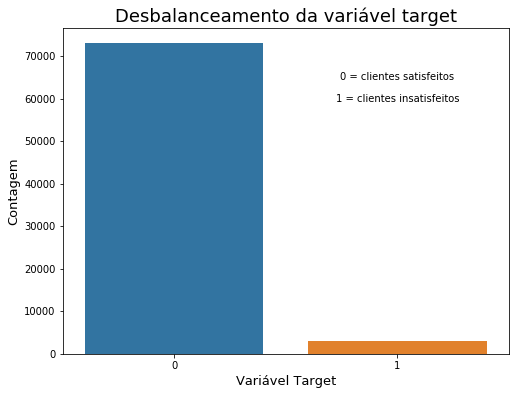

In [8]:
# BALANCEAMENTO - variável target desbalanceada - gráfico
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot('TARGET', data = dados)
ax.set_title('Desbalanceamento da variável target', fontsize = 18)
plt.xlabel('Variável Target', fontsize = 13)
plt.ylabel('Contagem', fontsize = 13)
ax.text(1,65000,"0 = clientes satisfeitos", fontsize = 10,color = "black", ha = "center", va = 'center')
ax.text(1,60000,"1 = clientes insatisfeitos", fontsize = 10,color = "black", ha = "center", va = 'center')
plt.show()

__Pré-Processamento dos dados__

In [9]:
# Normalização
preditoras_valores = dados.values[:, 0:370]
scaler = MinMaxScaler(feature_range = (0, 1))
valores_normalizados = scaler.fit_transform(preditoras_valores)

In [10]:
# Balanceamento - Over_sampling.SMOTE
target_valores = dados.values[:, 370]
balanceador = SMOTE()
valores_normalizados, target_balanceado = balanceador.fit_resample(valores_normalizados, target_valores)

In [11]:
# Verificando balanceamento - tabela
target_balanceado = pd.DataFrame(target_balanceado, columns = ['target'])
target_balanceado.target.value_counts()

1.0    73012
0.0    73012
Name: target, dtype: int64

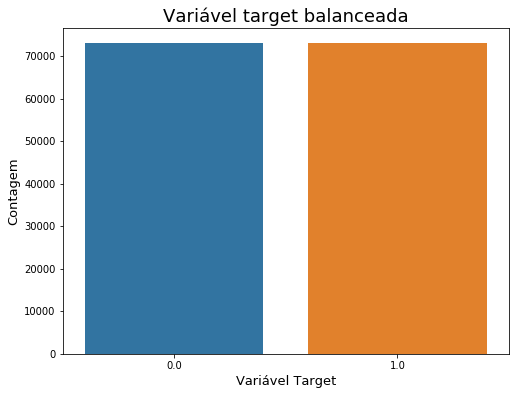

In [12]:
# verificando balanceamento - plot
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot('target', data = target_balanceado)
ax.set_title('Variável target balanceada', fontsize = 18)
plt.xlabel('Variável Target', fontsize = 13)
plt.ylabel('Contagem', fontsize = 13)
plt.show()

__Machine Learning__

In [13]:
# Divisão em teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(valores_normalizados, target_balanceado, test_size = 0.33)

_PCA - Principal Component Analysis e Logistic Regression_

Por existirem muitas colunas no dataset em questão, optei por iniciar os testes de algoritmos com o método PCA, tendo em vista sua característica de redução de colunas em componentes.

Além disso, vou executar uma pipeline com o modelo de classificação Logistic Regression.

In [14]:
# Seleção de atributos com a técnica de redução de dimensionalidade (feature extration)
pca = PCA(n_components = 10)

In [15]:
# Aplicação do pca nos datasets de treino e de teste
componentes = pca.fit_transform(x_treino)
componentes2 = pca.fit_transform(x_teste)

In [16]:
# Criação de DataFrames com os PCAs gerados
treino_pronto = pd.DataFrame(componentes)
teste_pronto = pd.DataFrame(componentes2)

In [17]:
# Instanciando o modelo de aprendizado de máquina de classificação - Logistic Regression
modelo = LogisticRegression()

In [18]:
# Criando um pipeline para aplicação do PCA e para o treinamento modelo de regressão logística
pipe = Pipeline([('pca', pca), ('logistic', modelo)])
pipe.fit(treino_pronto, y_treino)

C:\Users\fajar\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('logistic', LogisticRegression())])

In [19]:
# Fazendo previsões
previsoes = pipe.predict(teste_pronto)

Análise do Modelo (Regressão Logística com PCA)

In [20]:
# Relatório
print("Relatório de Classificação:\n", classification_report(y_teste, previsoes, digits=4))
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.6751    0.7123    0.6932     24083
         1.0     0.6958    0.6575    0.6761     24105

    accuracy                         0.6849     48188
   macro avg     0.6854    0.6849    0.6846     48188
weighted avg     0.6854    0.6849    0.6846     48188

Acurácia: 68.49%


In [21]:
# matriz de confusão - tabela
print(pd.crosstab(y_teste.iloc[:,0], previsoes, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0.0    1.0    All
Real                        
0.0      17154   6929  24083
1.0       8257  15848  24105
All      25411  22777  48188


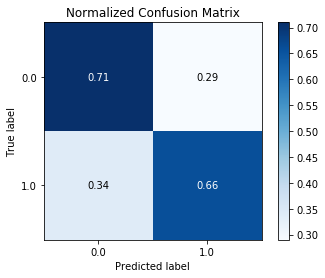

In [22]:
# matriz de confusão - plot
plot_confusion_matrix(y_teste, previsoes, normalize = True)
plt.show()

A acurácia não atingiu o objetivo estipulado inicialmente no projeto de ficar acima de 70%.

Além disso, as porcentagens observadas no recall também não são muito animadoras. Apesar de balanceado, o algoritmo parece ter aprendido um pouco mais com os dados de clientes satisfeitos (target = 0) se comparado aos dados de clientes insatisfeitos (target = 1).

Neste sentido, buscarei outro método.

Salvando o modelo (Regressão Logística com PCA)

In [23]:
arquivo = 'modelos/modelo_classificador_pca.sav'
pickle.dump(pipe, open(arquivo, 'wb'))

_Logistic Regression_

In [24]:
# Instanciando o modelo de aprendizado de máquina de classificação - Logistic Regression
modelo2 = LogisticRegression()

In [25]:
# Treinando o modelo de regressão logística
modelo2.fit(x_treino, y_treino)

C:\Users\fajar\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\fajar\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
# Fazendo as previsões
previsoes2 = modelo2.predict(x_teste)

Análise do modelo (Logistic Regression)

In [27]:
# Relatório
print("Relatório de Classificação:\n", classification_report(y_teste, previsoes2, digits=4))
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes2) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.7295    0.6794    0.7035     24083
         1.0     0.7002    0.7483    0.7234     24105

    accuracy                         0.7138     48188
   macro avg     0.7148    0.7138    0.7135     48188
weighted avg     0.7148    0.7138    0.7135     48188

Acurácia: 71.38%


In [28]:
# matriz de confusão - tabela
print(pd.crosstab(y_teste.iloc[:,0], previsoes2, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0.0    1.0    All
Real                        
0.0      16361   7722  24083
1.0       6068  18037  24105
All      22429  25759  48188


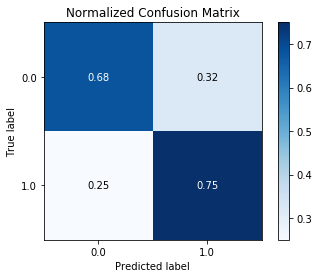

In [29]:
# matriz de confusão - plot
plot_confusion_matrix(y_teste, previsoes2, normalize = True)
plt.show()

Os resultados ainda não parecem satisfatórios.

Apesar da acurácia ter ficado acima do estabelecido (70%), os acertos do modelo ainda não parecem estar balanceados, tendo recall baixos e ainda desproporcionais entre clientes satisfeitos e clientes insatisfeitos.

Vou tentar mais uma técnica de Cross Validation, que pode ser mais confiável e oferecer maior acurácia. Ela divide os dados em partes (k-folds), no qual o valor de k é pré-definido. Dessa forma, o algoritmo é treinado k-folds vezes e, após término, as k-folds são sumarizadas através de uma estatística descritiva (vou usar a média).

Salvando o modelo (Logistic Regression)

In [30]:
arquivo2 = 'modelos/modelo_classificador_lr.sav'
pickle.dump(modelo2, open(arquivo2, 'wb'))

_Cross Validation e Logistic Regression_

In [31]:
# Instanciando o modelo de aprendizado de máquina de classificação - Logistic Regression
modelo3 = LogisticRegression()

In [32]:
# Definindo quantidade de folds
kfold = KFold(10, True)

In [33]:
# Procedimento de Cross Validation com modelo Logistic Regression
resultado = cross_val_score(modelo3, valores_normalizados, target_balanceado, cv = kfold, scoring = 'accuracy')

C:\Users\fajar\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\fajar\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\fajar\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Análise do modelo (Cross Validation e Logistic Regression)

In [34]:
# Observando acurácia de cada fold
for acuracia in range(10):
    print('Acurácia fold %d: %.2f%%' % ((acuracia.numerator + 1),resultado.take(acuracia) * 100))

Acurácia fold 1: 71.35%
Acurácia fold 2: 71.54%
Acurácia fold 3: 71.72%
Acurácia fold 4: 71.07%
Acurácia fold 5: 71.63%
Acurácia fold 6: 71.44%
Acurácia fold 7: 71.78%
Acurácia fold 8: 71.00%
Acurácia fold 9: 71.96%
Acurácia fold 10: 71.41%


In [35]:
# Imprimindo média de acurácia
print("Acurácia Final: %.2f%%" % (resultado.mean() * 100))

Acurácia Final: 71.49%


A acurácia não teve melhora significativa em relação à proposta anterior.

Talvez o modelo de regressão logísitica não seja o mais adequado para este caso. Este algoritmo funciona bem para conjuntos de dados que apresentem distribuição Gaussiana, ou seja, normal. Abaixo seguem alguns histogramas que mostram o contrário:

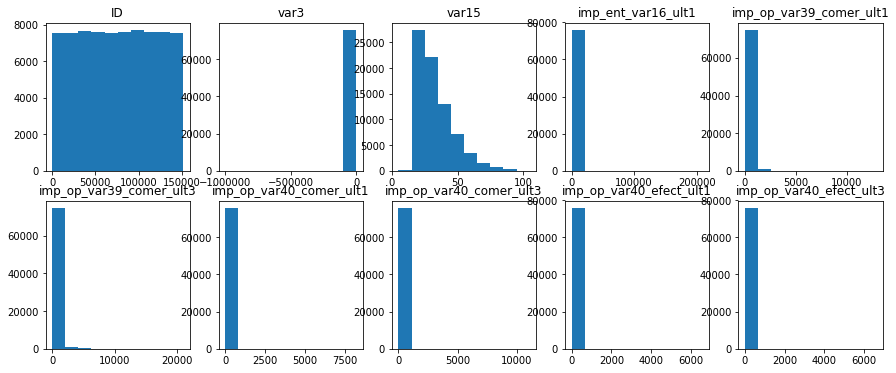

In [36]:
figure, ax = plt.subplots(2, 5, figsize = (15, 6))
contador = 0

for x in range(2):
    for y in range(5):
        ax[x,y].hist(dados.iloc[:, contador])
        ax[x,y].set_title(dados.columns[contador])
        contador += 1

plt.show()

Além de seguirem distribuição normal, os dados precisariam ainda sofrer um processo de padronização, para que a média fosse igual a 0 e o desvio padrão igual a 1.

Assim, provavelmente a regressão logística funcionaria de forma mais eficiente.

Neste sentido, buscarei outro algoritmo.

Salvando modelo (Cross Validation e Logistic Regression)

In [37]:
arquivo3 = 'modelos/modelo_classificador_lr_cv.sav'
pickle.dump(modelo3, open(arquivo3, 'wb'))

_CART (Classification and Regression Trees)_

Algoritmo não linear que tem como objetivo a redução da função custo.

In [38]:
# Instanciando modelo de aprendizado de máquina de classificação - CART
modelo4 = DecisionTreeClassifier()

In [39]:
# treinando modelo
modelo4.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [40]:
# fazendo previsões
previsoes4 = modelo4.predict(x_teste)

Análise do modelo (CART)

In [41]:
# Relatório
print("Relatório de Classificação:\n", classification_report(y_teste, previsoes4, digits=4))
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes4) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.9461    0.9355    0.9407     24083
         1.0     0.9362    0.9467    0.9415     24105

    accuracy                         0.9411     48188
   macro avg     0.9412    0.9411    0.9411     48188
weighted avg     0.9412    0.9411    0.9411     48188

Acurácia: 94.11%


In [42]:
# matriz de confusão - tabela
print(pd.crosstab(y_teste.iloc[:,0], previsoes4, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0.0    1.0    All
Real                        
0.0      22529   1554  24083
1.0       1284  22821  24105
All      23813  24375  48188


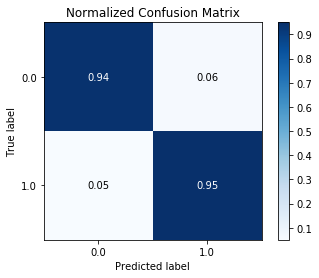

In [43]:
# matriz de confusão - plot
plot_confusion_matrix(y_teste, previsoes4, normalize = True)
plt.show()

Além da acurácia altíssima, observamos que não temos problemas de balanceamento neste dataset. As % referentes ao recall também estão adequadas e o modelo parece atender a demanda.

Utilizar um modelo que não dependesse da existência de distribuição normal nos dados pode ter sido a solução neste caso.

Salvando modelo (CART)

In [44]:
arquivo4 = 'modelos/modelo_classificador_cart.sav'
pickle.dump(modelo4, open(arquivo4, 'wb'))

__Aplicando o modelo final no conjunto de dados de teste e salvando previsões__

In [45]:
# Carregando dataset de teste
teste = pd.read_csv('datasets/test.csv')

In [46]:
# Baixando modelo
modelo_classificador_satisfacao = pickle.load(open(arquivo4, 'rb'))

In [47]:
# Fazendo as previsões e alterando-as de float para inteiro (classes - 0 = cliente satisfeito / 1 = cliente insatisfeito)
previsoes_final = modelo_classificador_satisfacao.predict(teste)
previsoes_final = previsoes_final.astype(int)

In [51]:
# Salvando as previsões
id = np.arange(1, 75819)
dataframe_previsoes = {'ID': id, 'TARGET': previsoes_final}
dataframe_previsoes = pd.DataFrame(dataframe_previsoes)
dataframe_previsoes = dataframe_previsoes.set_index('ID')
dataframe_previsoes.to_csv('datasets/previsoes.csv', sep = ';')